# summary statistics and opening analysis

In [43]:
#adding notebook to github project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
df = pd.read_csv('games.csv')
df.head()
df.dtypes
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [45]:
#no columns containing na values
df.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [46]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [47]:
#drop --> moves
df.drop(['moves'], axis=1, inplace=True)
#opening_ply = number of moves in opening 
#increment code https://chess.stackexchange.com/questions/18069/what-is-the-increment-in-chess#:~:text=On%20chess%20servers%20(like%20Internet,amount%20added%20after%20each%20move.

In [48]:
#convert created and last move at to duration
df['duration'] = df['last_move_at'] - df['created_at']
df['duration'].value_counts()
#there are some games that have a duration of 0 but still have many moves in them. what happened here?

0.0           8548
10000000.0     734
496879.0         3
25867.0          3
1816187.0        3
              ... 
518592.0         1
783416.0         1
709501.0         1
193759.0         1
3603429.0        1
Name: duration, Length: 10327, dtype: int64

In [49]:
#how many unique openings are there
opening_eco = df['opening_eco'].nunique()
opening_name = df['opening_name'].nunique()
print('opening eco:',opening_eco)
print('opening name:',opening_name)
#weird - there are way more distinct opening names than opening ecos --> could this be misspelling?
#there are different variations of openings that are often mapped to the same opening_eco 
#for instance Ruy Lopez: Berlin Defense #2 is mapped to C65 and Ruy Lopez: Berlin Defense |  Beverwijk Variation is also mapped to C65
#because of this i think that opening name actually provides more information

opening eco: 365
opening name: 1477


In [50]:
opening_name_counts = df['opening_name'].value_counts()
opening_name_counts[0:21]

Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
French Defense: Knight Variation                 271
Scotch Game                                      271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Caro-Kann Defense                                199
Philidor Defense #3                              198
Philidor Defense #2                              193
Indian Game                                      181
Italian Game: Anti-Fried Liver Defense           180
Four Knights Game: Italian Variation             176
Modern Defense                                   174
Owen Defense                                     168
King's Pawn Game: Wayward Queen Attack        

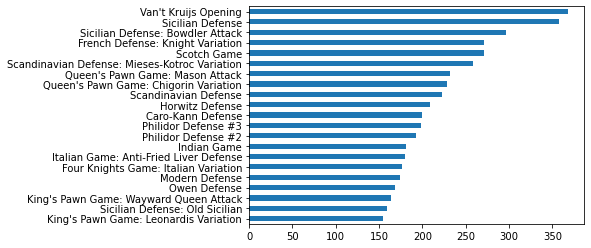

In [51]:
opening_plots_bar = opening_name_counts[0:21].plot.barh(x = 'opening', y = 'count').invert_yaxis()

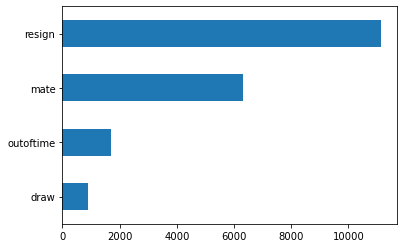

In [52]:
df['victory_status'].value_counts().plot.barh().invert_yaxis()

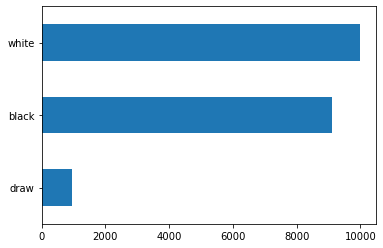

In [53]:
df['winner'].value_counts().plot.barh().invert_yaxis()

In [54]:
#dummy variables for black_win and white_win
dummy_winner = pd.get_dummies(df['winner'])
dummy_winner
df = pd.concat([df, dummy_winner], axis = 1)

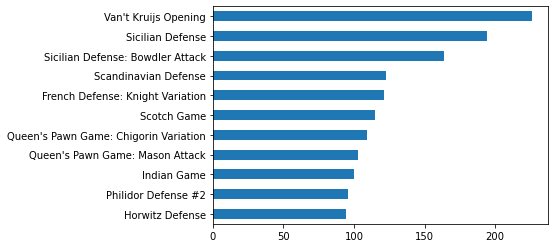

In [55]:
black_wins = df.loc[df['black'] == 1]
black_wins_counts = black_wins['opening_name'].value_counts()
black_wins_counts[0:11].plot.barh().invert_yaxis()

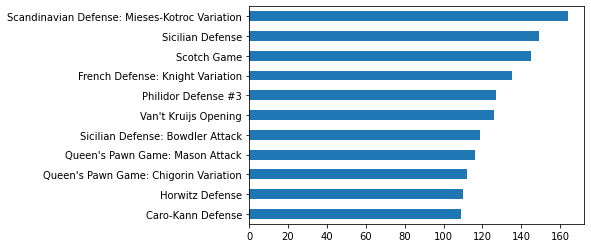

In [56]:
white_wins = df.loc[df['white'] == 1]
white_wins_counts = white_wins['opening_name'].value_counts()
white_wins_counts[0:11].plot.barh().invert_yaxis()

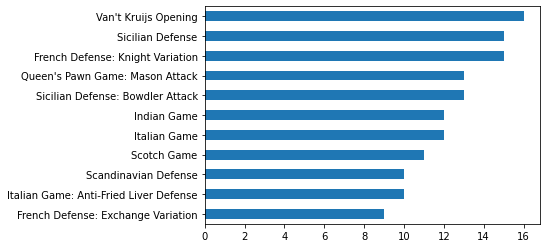

In [57]:
draw = df.loc[df['draw'] == 1]
draw_counts = draw['opening_name'].value_counts()
draw_counts[0:11].plot.barh().invert_yaxis()

In [58]:
white_better_than_black = df.loc[df['white_rating'] > df['black_rating']]
white_better_than_black
#10184
white_better_than_black['white'].value_counts()
wbtb_perc_white_win = 6529/10184
wbtb_perc_white_win

0.6411036920659858

In [59]:
black_better_than_white = df.loc[df['black_rating'] > df['white_rating']]
black_better_than_white
#9671
black_better_than_white['black'].value_counts()
#5823
bbtw_perc_black_win = 5823/9671
bbtw_perc_black_win

0.6021093992348258

In [60]:
df.corr().head()

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,duration,black,draw,white
rated,1.000000,-0.001171,-0.001176,0.090698,0.003284,0.032655,-0.001906,-0.027952,0.012417,-0.027358,-0.000743
created_at,-0.001171,1.000000,1.000000,0.083185,0.116170,0.133316,0.100201,-0.022691,0.013830,0.024690,-0.024260
last_move_at,-0.001176,1.000000,1.000000,0.083196,0.116172,0.133318,0.100203,-0.022522,0.013829,0.024694,-0.024261
turns,0.090698,0.083185,0.083196,1.000000,0.129753,0.160467,0.055999,0.060526,0.007019,0.170648,-0.079486
white_rating,0.003284,0.116170,0.116172,0.129753,1.000000,0.634171,0.277379,0.010905,-0.148371,0.045114,0.128577


In [61]:
#duration segmentation? --> long, medium, short

In [62]:
#interesting games analysis article: https://medium.com/@bert_miller/using-python-to-build-a-statistical-model-to-predict-the-winner-of-a-professional-game-of-dota-6dbdc4255949

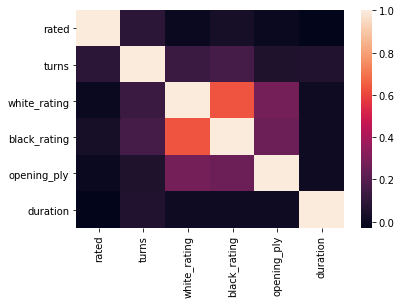

In [63]:
#correlation heatmap
drop_cols = ['id','created_at', 'last_move_at', 'white_id', 'black_id', 'opening_name', 'black', 'white', 'draw']
df2 = df.copy()
df2.drop(columns=drop_cols, inplace=True)
heatmap = sns.heatmap(df2.corr())
#interesting: number of turns is associated with white and black ranking and opening_ply is closely associated with the player ranking
#players of similar ranks play other players of similar ranks

# logistic regression model

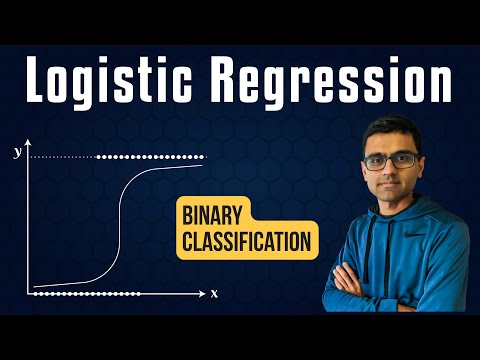

In [64]:
#helpful resources:
from IPython.core.display import display, HTML
display(HTML("""<a href="https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc">logistic regression</a>"""))
display(HTML("""<a href="https://github.com/SSaishruthi/LogisticRegression_Vectorized_Implementation/blob/master/Logistic_Regression.ipynb">logistic regression git ex 1</a>"""))
display(HTML("""<a href="https://github.com/codebasics/py/blob/master/ML/7_logistic_reg/Exercise/7_logistic_regression_exercise.ipynb
">logistic regression git ex 2</a>"""))
display(HTML("""<a href="https://towardsdatascience.com/predicting-the-outcome-of-nba-games-with-machine-learning-a810bb768f20">NBA games</a>"""))

from IPython.display import YouTubeVideo
YouTubeVideo('zM4VZR0px8E', width=800, height=400)

In [65]:
#count of draws is a small portion of winning outcomes
df['winner'].value_counts()
(950 / (10001+9107+950))* 100

#create a new data frame, dropping the draw games to more easily be able to use logistic regression
df_black_white = df[df.winner != 'draw'].copy()
df_black_white = df_black_white[df_black_white.rated == 1].copy()

#drop columns not necessary for analysis
drop_cols = ['id','created_at', 'last_move_at', 'white_id', 'black_id', 'opening_name', 'black', 'white', 'draw', 'rated']
df_black_white.drop(columns=drop_cols, inplace=True)
df_black_white

,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,duration
1,16,resign,black,5+10,1322,1261,B00,4,0.0
2,61,mate,white,5+10,1496,1500,C20,3,0.0
3,61,mate,white,20+0,1439,1454,D02,3,0.0
4,95,mate,white,30+3,1523,1469,C41,5,0.0
6,33,resign,white,10+0,1520,1423,D00,10,0.0
...,...,...,...,...,...,...,...,...,...
20053,24,resign,white,10+10,1691,1220,A80,2,321734.0
20054,82,mate,black,10+0,1233,1196,A41,2,744219.0
20055,35,mate,white,10+0,1219,1286,D00,3,172834.0
20056,109,resign,white,10+0,1360,1227,B07,4,946699.0


In [66]:
#convert columns with text or different discrete values into dummy columns
dum_cols = ['victory_status', 'increment_code', 'opening_eco']
for col in dum_cols:
    dummies = pd.get_dummies(df_black_white[col], prefix=col)
    df_black_white = pd.concat([df_black_white, dummies], axis=1)
df_black_white.drop(columns=dum_cols, inplace=True)

In [67]:
#replace winner and related columns with discrete number expressions of variable
df_black_white['winner'].replace(['white', 'black'], [0,1], inplace=True)
#df_black_white['rated'].replace([False, True], [0,1], inplace=True)
df_black_white

,turns,winner,white_rating,black_rating,opening_ply,duration,victory_status_mate,victory_status_outoftime,victory_status_resign,increment_code_0+12,...,opening_eco_E81,opening_eco_E87,opening_eco_E88,opening_eco_E90,opening_eco_E91,opening_eco_E92,opening_eco_E94,opening_eco_E95,opening_eco_E97,opening_eco_E98
1,16,1,1322,1261,4,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,61,0,1496,1500,3,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,61,0,1439,1454,3,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95,0,1523,1469,5,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,33,0,1520,1423,10,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,24,0,1691,1220,2,321734.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20054,82,1,1233,1196,2,744219.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20055,35,0,1219,1286,3,172834.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20056,109,0,1360,1227,4,946699.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#scaling turns, duration, rating
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_col = ['turns', 'duration', 'white_rating', 'black_rating']
for col in scaled_col:
    df_black_white[col] = sc.fit_transform(df_black_white[col].values.reshape(-1,1))

In [69]:
#define target variable for regression
y = df_black_white.winner

In [70]:
#define independent variables for regression
df_black_white.drop(columns = 'winner', inplace=True)

In [71]:
#split dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_black_white,y,train_size=0.85, random_state=100)

In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test,y_test)

0.6463730569948186

Feature: 0, Score: 0.06539
Feature: 1, Score: -1.25358
Feature: 2, Score: 1.26842
Feature: 3, Score: -0.00662
Feature: 4, Score: 0.01723
Feature: 5, Score: -0.10216
Feature: 6, Score: 0.07796
Feature: 7, Score: 0.01523
Feature: 8, Score: -0.36954
Feature: 9, Score: -0.24119
Feature: 10, Score: -0.99527
Feature: 11, Score: 0.65720
Feature: 12, Score: 0.00000
Feature: 13, Score: -0.57952
Feature: 14, Score: -0.14388
Feature: 15, Score: -1.08355
Feature: 16, Score: 0.33309
Feature: 17, Score: 0.00000
Feature: 18, Score: -0.78145
Feature: 19, Score: -0.00992
Feature: 20, Score: -0.10989
Feature: 21, Score: 0.58043
Feature: 22, Score: -0.08700
Feature: 23, Score: 0.03703
Feature: 24, Score: 0.20462
Feature: 25, Score: 0.01097
Feature: 26, Score: -0.10289
Feature: 27, Score: -1.08817
Feature: 28, Score: -0.22248
Feature: 29, Score: 0.35859
Feature: 30, Score: -0.24705
Feature: 31, Score: 0.06426
Feature: 32, Score: -0.19455
Feature: 33, Score: 0.12297
Feature: 34, Score: 0.42693
Feature: 35,

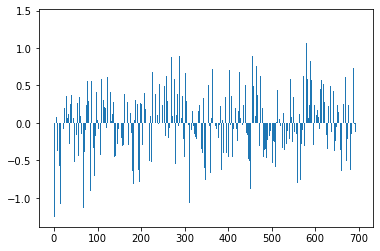

In [73]:
#feature importance
from matplotlib import pyplot
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
#want to try to rank these importance scores and identify what are the most important features
#source: https://machinelearningmastery.com/calculate-feature-importance-with-python/

# random forest model

In [74]:
display(HTML("""<a href="https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652">random forest medium article</a>"""))

In [75]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(df_black_white, y, test_size=0.33, random_state=66)

In [76]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score = cross_val_score(rfc, df_black_white, y, cv=10, scoring='roc_auc')

In [78]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[1919  778]
 [ 924 1473]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      2697
           1       0.65      0.61      0.63      2397

    accuracy                           0.67      5094
   macro avg       0.66      0.66      0.66      5094
weighted avg       0.67      0.67      0.67      5094



=== All AUC Scores ===
[0.73338488 0.70310979 0.71216097 0.69337614 0.71882628 0.76830025
 0.77673416 0.72031931 0.7208024  0.75275463]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7299768831375235


# openings meta statistics

In [23]:
opdf = pd.DataFrame(columns=['Opening', 'Pick %', 'White Win %', 'Black Win %'])

In [42]:
df = pd.read_csv('games.csv')
openings = df['opening_eco']
#opening_counts = df['opening_eco'].value_counts()
#open30 = opening_counts[0:31]
#open30
#len(df[df['opening_eco']=='A00'])
#len(df['opening_eco'])
black_df = df.copy()
black_df = black_df[black_df['winner'] == 'black']
len(new_df[new_df['opening_eco']=='A00'])
(len(black_df[black_df['opening_eco']=='D10'])) / len(df[df['opening_eco']=='D10'])*100

52.72727272727272

In [39]:
for opening in openings:
    eco_name = opening
    eco_pick_perc = (len(df[df['opening_eco']==opening])) / len(df['opening_eco'])*100
    
    black_df = df.copy()
    black_df = black_df[black_df['winner'] == 'black']
    eco_win_perc_black = (len(black_df[black_df['opening_eco']==opening])) / len(df[df['opening_eco']==opening])*100
    
    white_df = df.copy()
    white_df = white_df[white_df['winner'] == 'white']
    eco_win_perc_white = (len(white_df[white_df['opening_eco']==opening])) / len(df[df['opening_eco']==opening])*100
    
    opdf_df = pd.DataFrame([[eco_name, eco_pick_perc, eco_win_perc_black, eco_win_perc_white]], columns=['Opening', 'Pick %', 'White Win %', 'Black Win %'])
    opdf = opdf.append(opdf_df, ignore_index=True)

In [40]:
opdf

,Opening,Pick %,White Win %,Black Win %
0,D10,0.005484,NaN,NaN
1,B00,0.030462,NaN,NaN
2,C20,0.033652,NaN,NaN
3,D02,0.021637,NaN,NaN
4,C41,0.034450,NaN,NaN
...,...,...,...,...
40111,A80,0.274205,41.8182,52.7273
40112,A41,0.373916,40,60
40113,D00,3.684315,48.7145,46.1434
40114,B07,1.515605,38.4868,55.5921


In [ ]:
#https://plotly.com/python/table/